<a href="https://colab.research.google.com/github/221sakshisharma/coursera-ML-work/blob/main/KmeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install plotly

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn.preprocessing import StandardScaler

import plotly.express as px

%matplotlib inline

#Making a sample Database using makeblob for learning purposes

##Creating a Dataset

In [162]:
np.random.seed(0)

In [163]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [164]:
X # Feature Matrix

array([[-1.82150565,  0.07098024],
       [ 2.16732621, -2.93199608],
       [ 0.8465158 , -3.26075305],
       ...,
       [ 3.29772603,  4.24400152],
       [-1.69503125, -0.29979681],
       [-1.64362141,  0.63035513]])

In [165]:
y # Response Vector

array([1, 2, 2, ..., 0, 1, 1])

##Visualising the Dataset

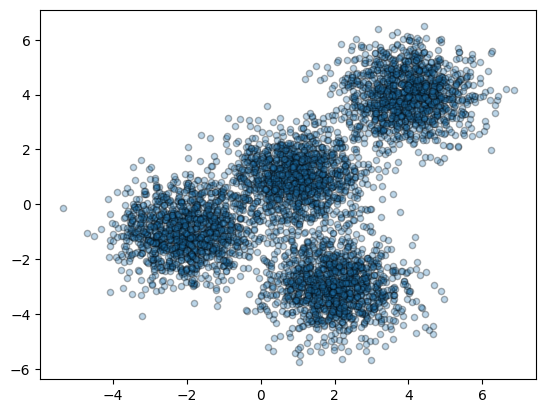

In [166]:
plt.scatter(X[:, 0], X[:, 1], s=80, marker='.',alpha=0.3,ec='k')

##Setting up Algorithm

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

The KMeans class has many parameters that can be used, some of them are:

- `init`: Initialization method of the centroids. `k-means++`: Selects initial cluster centres for k-means clustering in a smart way to speed up convergence.
- `n_clusters`: The number of clusters to form as well as the number of centroids to generate.
- `n_init`: Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

In [173]:
k_means = KMeans(init='k-means++', n_clusters=4, n_init=12)

In [174]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [175]:
k_means_labels = k_means.labels_
set(k_means_labels)

{np.int32(0), np.int32(1), np.int32(2), np.int32(3)}

In [176]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers #predicted centers by the algorithm

array([[ 1.99741008, -3.01666822],
       [ 0.96900523,  0.98370298],
       [ 3.97334234,  3.98758687],
       [-2.03743147, -0.99782524]])

##Visualization of Algorithm performance

tab10 is a categorical colormap of 10 fixed colors, give a result like for each value
<pre>[
 [R, G, B, A],
 [R, G, B, A],
 [R, G, B, A],
]
</pre>


In [177]:
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

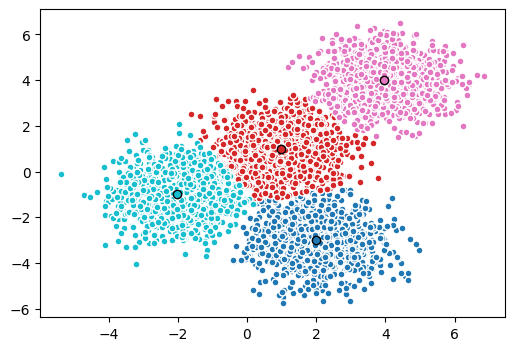

In [178]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means_cluster_centers)), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]

    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)


#K-Means Clustering on real world dataset of Customer Segmentation



In [179]:
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")

In [180]:
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [107]:
cust_df.shape

(850, 10)

In [108]:
cust_df = cust_df.drop('Address', axis=1)

In [109]:
cust_df.isnull().sum()

,0
Customer Id,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,150
DebtIncomeRatio,0


In [110]:
cust_df = cust_df.dropna()

In [111]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [112]:
std_scalar = StandardScaler()

In [113]:
X = std_scalar.fit_transform(cust_df.iloc[:, 1:])

In [114]:
X

array([[ 0.76830405,  0.29879269, -0.35900652, ..., -0.60428433,
        -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891, ...,  1.5706204 ,
        -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057, ...,  0.83520125,
         1.68081427,  1.55949495],
       ...,
       [-1.2337912 ,  2.45502862, -1.26081715, ...,  0.04620852,
         1.68081427,  3.39170678],
       [-0.35787453, -0.77932527,  0.54280411, ..., -0.71904138,
        -0.59494973, -1.07889008],
       [ 2.14474454, -0.77932527,  1.1440112 , ...,  0.17648972,
        -0.59494973, -0.24340149]])

##Modelling

In [115]:
k = 3

In [116]:
k_means = KMeans(init='k-means++', n_clusters=k, n_init=15)

In [117]:
k_means.fit(X)

KMeans(n_clusters=3, n_init=15)

In [118]:
labels = k_means.labels_
set(k_means_labels)

{np.int32(0), np.int32(1), np.int32(2), np.int32(3)}

In [119]:
cluster_centers = k_means.cluster_centers_
cluster_centers

array([[-0.14176672, -0.130892  , -0.11177099, -0.25429683, -0.36179336,
        -0.39860131, -0.59494973, -0.39263382],
       [ 1.03258063,  0.25566797,  1.279884  ,  1.3714983 ,  1.23805414,
         1.446919  , -0.12159082,  0.60651028],
       [-0.43715004,  0.13807946, -0.70628763, -0.41092174, -0.03089638,
        -0.09840952,  1.62427355,  0.53873674]])

In [120]:
cust_df["Clus_km"] = labels

In [121]:
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1
...,...,...,...,...,...,...,...,...,...,...
844,845,41,1,7,43,0.694,1.198,0.0,4.4,0
846,847,28,2,7,34,0.359,2.021,0.0,7.0,0
847,848,25,4,0,18,2.802,3.210,1.0,33.4,2
848,849,32,1,12,28,0.116,0.696,0.0,2.9,0


In [123]:
cust_df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,438.731884,33.727053,1.601449,7.644928,36.246377,0.788126,1.748710,0.000000,7.581884
1,416.848000,43.112000,1.960000,16.904000,96.056000,4.172896,7.811616,0.208000,14.398400
2,419.763975,31.366460,1.850932,3.689441,30.484472,1.488199,2.734901,0.975155,13.936025


In [124]:
cust_df.groupby('Clus_km').size()

,0
Clus_km,
0,414
1,125
2,161


In [146]:
fig = px.scatter(
    cust_df,
    x='Age',
    y='Income',
    color='Clus_km',  # Color points by cluster
    symbol='Defaulted',  # Optional: shape by default status
    hover_data=['Years Employed', 'Edu'],  # Show extra info on hover
    title="Customer Segmentation by Age and Income"
)

fig.show()

In [144]:

fig = px.scatter_3d(
    cust_df,
    x='Age',
    y='Income',
    z='DebtIncomeRatio',
    color='Clus_km',
    symbol='Defaulted',
    hover_data=['Years Employed', 'Card Debt'],
    title="3D Customer Clustering",
    opacity=0.5,
)

fig.update_layout(
    width=1000,
    height=800
)
fig.update_traces(marker=dict(size=3))